In [2]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/49.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/49.8 kB ? eta -:--:--
     ---------------------------------------- 49.8/49.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB 5.2 MB/s eta 0:01:12
   ---------------------------------------- 0.3/376.0 MB 3.3 MB/s eta 0:01:55
   ---------------------------------------- 0.6/376.0 MB 3.7 MB/s eta 0:01:43
   ---------------------------------------- 0.8/376.0 MB 3.8 MB/s eta 0:01:40
   ---------------------------------------- 0.9/376.0 MB 3.6 MB/s eta 0:01:45
   ---------------------------------------- 1.1/376.0 MB 3.7 MB/s eta 0:01:41
   ---------------------------------------- 1.3/376.0 MB 3.8 MB/s eta 0:01:39
   ---------------------------------------- 1.5/376.0 MB 3.9 MB/s eta 0:01:37
   -------------

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [30]:

#Loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [31]:
#Normalize the independent variables aka X 

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std


In [32]:
#Building the model

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model


In [33]:
myModel = build_model()

c:\Users\junai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
#Train/fit the model

history = myModel.fit(x_train, y_train, epochs= 100, batch_size=16, validation_split=0.2, verbose=0)

In [35]:
#Evaluating the model

mse_test, mae_test = myModel.evaluate(x_test, y_test)

print(f"Test MSE :{mse_test}")
print(f"Test MAE :{mae_test}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.6011 - mae: 2.6067
Test MSE :20.8372859954834
Test MAE :2.7962656021118164


In [36]:
#History of the model

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

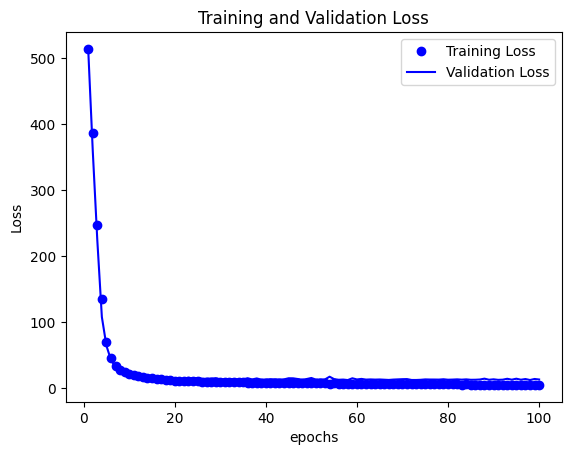

In [37]:
#Plotting the model


epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()